In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Loan_Application.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
(50/614)*100

8.143322475570033

In [9]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# filling continous data columns with the mean value of that column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

# filling catagorical data columns with the mean value of that column
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [11]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

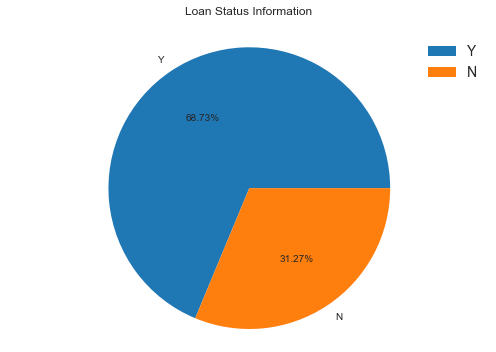

In [12]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts().index, autopct='%1.2f%%')
plt.title('Loan Status Information\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Gender
Male      502
Female    112
dtype: int64

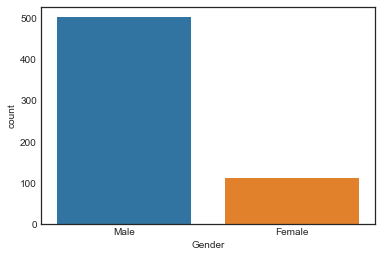

In [13]:
sns.countplot(df['Gender'])
df.value_counts('Gender')

Married
Yes    401
No     213
dtype: int64

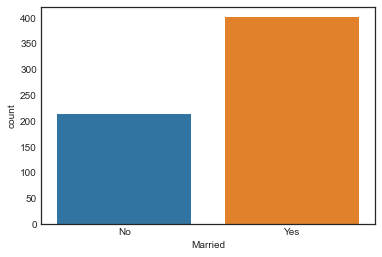

In [14]:
sns.countplot(df['Married'])
df.value_counts('Married')

Dependents
0     360
1     102
2     101
3+     51
dtype: int64

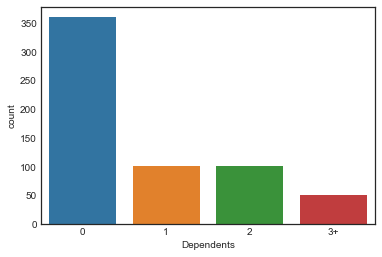

In [15]:
sns.countplot(df['Dependents'])
df.value_counts('Dependents')

Education
Graduate        480
Not Graduate    134
dtype: int64

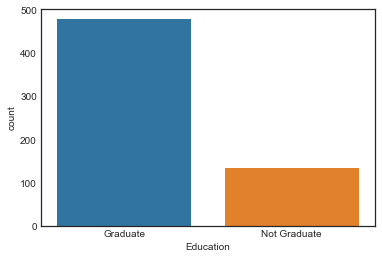

In [16]:
sns.countplot(df['Education'])
df.value_counts('Education')

Self_Employed
No     532
Yes     82
dtype: int64

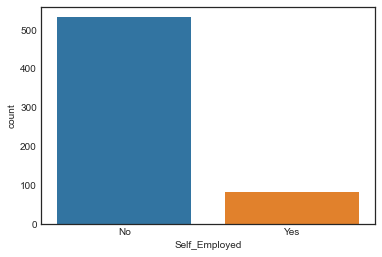

In [17]:
sns.countplot(df['Self_Employed'])
df.value_counts('Self_Employed')

Property_Area
Semiurban    233
Urban        202
Rural        179
dtype: int64

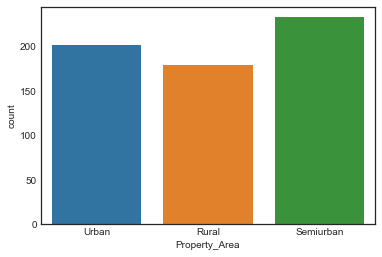

In [18]:
sns.countplot(df['Property_Area'])
df.value_counts('Property_Area')

Loan_Status
Y    422
N    192
dtype: int64

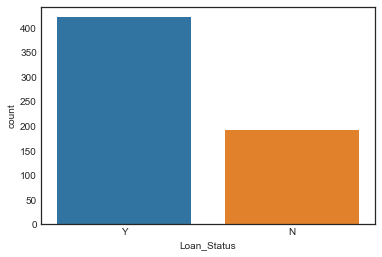

In [19]:
sns.countplot(df['Loan_Status'])
df.value_counts('Loan_Status')

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
dtype: int64

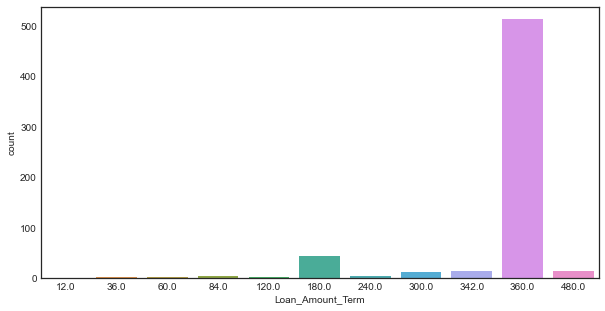

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df['Loan_Amount_Term'])
df.value_counts('Loan_Amount_Term')

# Bivarient Analysis

In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

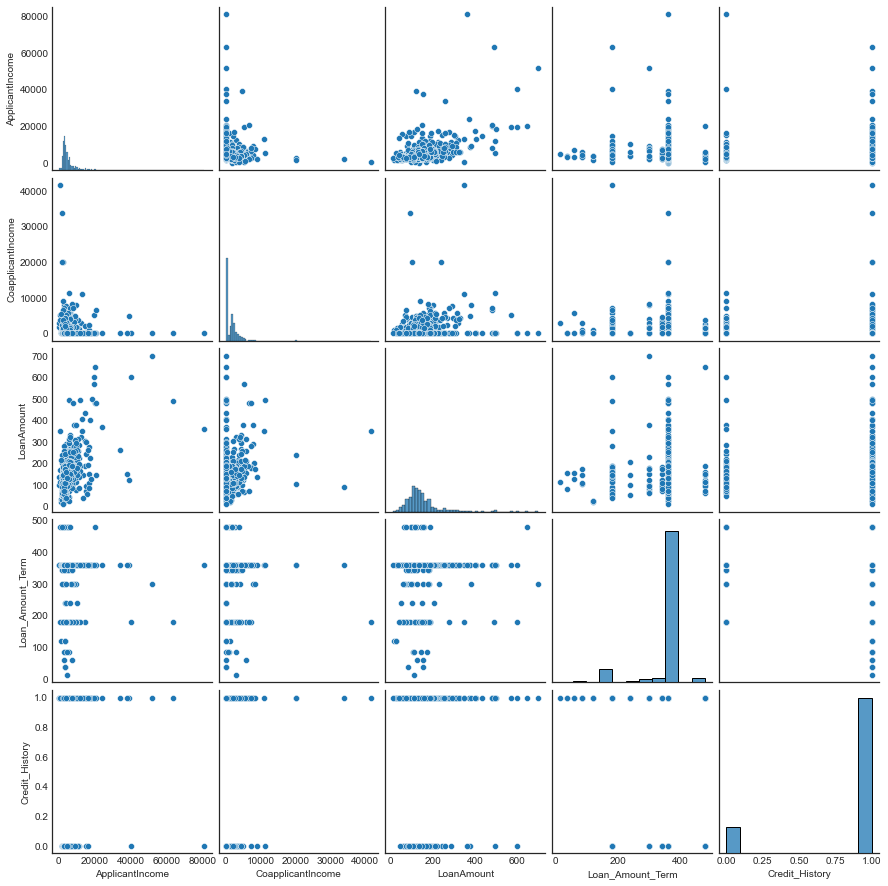

In [22]:
sns.pairplot(df)

In [23]:
df_cor=df.corr()
df_cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000


<AxesSubplot:>

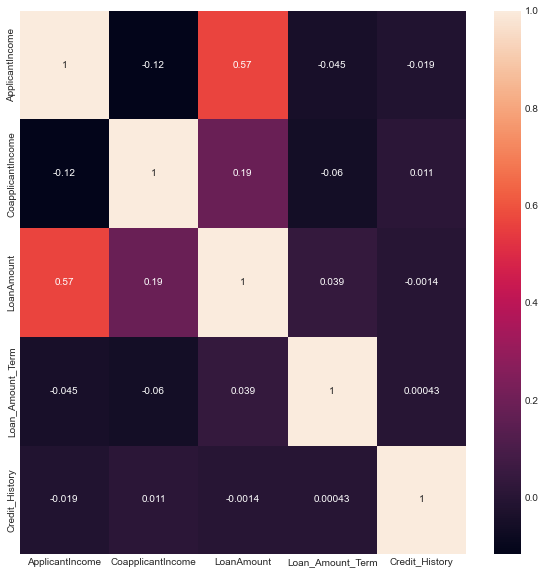

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cor, annot= True)

In [27]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [31]:
oe= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [32]:
df_cor=df.corr()
df_cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974


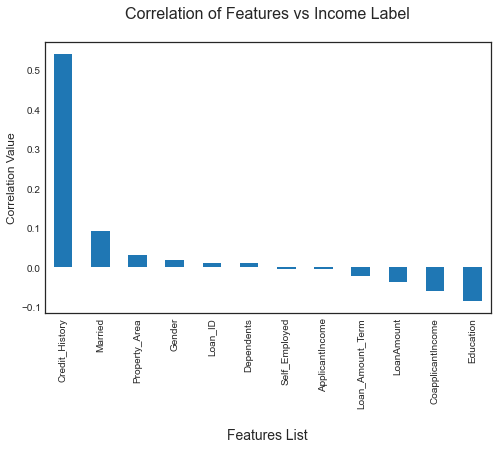

In [59]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(8,5))
df_corr['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

<AxesSubplot:>

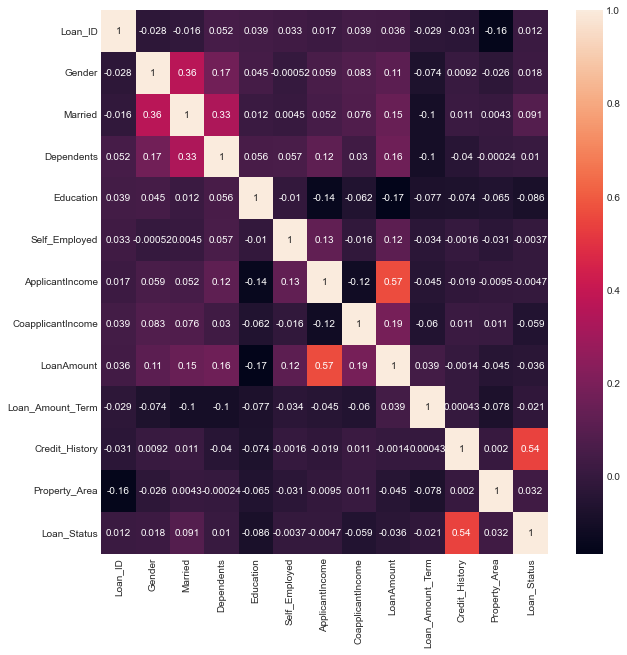

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cor, annot= True)

In [34]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


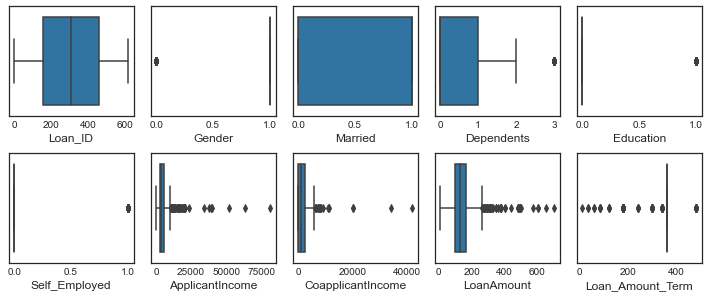

In [35]:
plt.figure(figsize=(10,10))
plot=1
for i in df.columns:
    if plot<=10:
        plt.subplot(5,5,plot)
        sns.boxplot(df[i])
        plt.xlabel(i, size=12)
    plot+=1
plt.tight_layout()

In [36]:
from scipy.stats import zscore
z= np.abs(zscore(df))
z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.729232,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.000000,0.279851,0.411733,1.223298,0.674519
1,1.723590,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.219273,0.279851,0.411733,1.318513,1.482537
2,1.717948,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.957641,0.279851,0.411733,1.223298,0.674519
3,1.712307,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.314547,0.279851,0.411733,1.223298,0.674519
4,1.706665,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.064454,0.279851,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.898095,0.279851,0.411733,1.318513,0.674519
610,1.712307,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.267279,2.518655,0.411733,1.318513,0.674519
611,1.717948,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.269371,0.279851,0.411733,1.223298,0.674519
612,1.723590,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.483367,0.279851,0.411733,1.223298,0.674519


In [37]:
df_z=df[(z<3).all(axis=1)]
df_z

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [38]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df_z.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df_z.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (614, 13)
Shape of the dataframe after removing outliers:  (577, 13)
Percentage of data loss post outlier removal:  6.026058631921824


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [40]:
x= df_z.drop('Loan_Status', axis=1)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0


In [41]:
y=df_z['Loan_Status']
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 577, dtype: float64

In [42]:
y.value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

### Remove Imabalance Issue

In [43]:
from imblearn.over_sampling import SMOTE
reimb=SMOTE()

In [44]:
x,y=reimb.fit_resample(x,y)

In [45]:
y.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

### Scaling the data

In [46]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.725668,0.497657,-1.398288,-0.778050,-0.588187,-0.411872,0.429668,-0.847182,0.192636,0.260113,0.596108,1.272834
1,-1.719968,0.497657,0.775263,0.263557,-0.588187,-0.411872,-0.012728,0.082206,-0.145709,0.260113,0.596108,-1.331843
2,-1.714267,0.497657,0.775263,-0.778050,-0.588187,2.735782,-0.565898,-0.847182,-1.285034,0.260113,0.596108,1.272834
3,-1.708567,0.497657,0.775263,-0.778050,1.849785,-0.411872,-0.711616,0.606066,-0.292719,0.260113,0.596108,1.272834
4,-1.702867,0.497657,-1.398288,-0.778050,-0.588187,-0.411872,0.482434,-0.847182,0.093181,0.260113,0.596108,1.272834


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 85.42713567839196 on Random State 86


,Importance
Features,
Credit_History,0.281
ApplicantIncome,0.129
Loan_ID,0.116
LoanAmount,0.107
CoapplicantIncome,0.075
Property_Area,0.074
Dependents,0.054
Married,0.039
Education,0.038


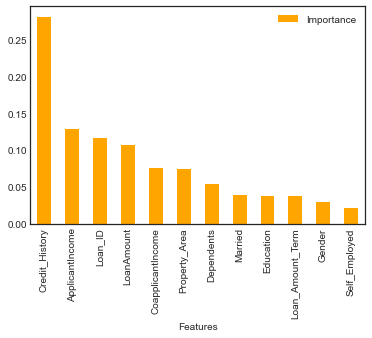

In [49]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='orange')
importances

# Machine Learning Algorithms

In [50]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [51]:
def algorithm(model, X,y):
    
    # Splitting the data
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=86)
    
    # Modeling of Algorithm
    model.fit(X_train,Y_train)
    
    #Predicting the data
    pred=model.predict(X_test)
    
    # Classification Report 
    print('Classification Report = ', classification_report(Y_test,pred))
    
    #Accuracy Score
    print('Accuracy Score = ', accuracy_score(Y_test, pred))
    
    #Confusion Matrix
    print('Consufion Matrix = \n', confusion_matrix(Y_test,pred))

In [52]:
model=LogisticRegression()
algorithm(model,X,y)

Classification Report =                precision    recall  f1-score   support

         0.0       0.95      0.68      0.79       103
         1.0       0.80      0.97      0.88       136

    accuracy                           0.85       239
   macro avg       0.87      0.83      0.83       239
weighted avg       0.86      0.85      0.84       239

Accuracy Score =  0.8451882845188284
Consufion Matrix = 
 [[ 70  33]
 [  4 132]]


In [53]:
model= DecisionTreeClassifier()
algorithm(model,X,y)

Classification Report =                precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       103
         1.0       0.88      0.80      0.84       136

    accuracy                           0.82       239
   macro avg       0.82      0.83      0.82       239
weighted avg       0.83      0.82      0.83       239

Accuracy Score =  0.8242677824267782
Consufion Matrix = 
 [[ 88  15]
 [ 27 109]]


In [54]:
model=KNeighborsClassifier()
model=algorithm(model,X,y)

Classification Report =                precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       103
         1.0       0.85      0.87      0.86       136

    accuracy                           0.84       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.84      0.84      0.84       239

Accuracy Score =  0.8368200836820083
Consufion Matrix = 
 [[ 82  21]
 [ 18 118]]


In [55]:
model= RandomForestClassifier()
algorithm(model,X,y)

Classification Report =                precision    recall  f1-score   support

         0.0       0.96      0.83      0.89       103
         1.0       0.89      0.97      0.93       136

    accuracy                           0.91       239
   macro avg       0.92      0.90      0.91       239
weighted avg       0.92      0.91      0.91       239

Accuracy Score =  0.9121338912133892
Consufion Matrix = 
 [[ 86  17]
 [  4 132]]


In [56]:
model=ExtraTreesClassifier()
algorithm(model,X,y)

Classification Report =                precision    recall  f1-score   support

         0.0       0.95      0.85      0.90       103
         1.0       0.90      0.96      0.93       136

    accuracy                           0.92       239
   macro avg       0.92      0.91      0.91       239
weighted avg       0.92      0.92      0.92       239

Accuracy Score =  0.9163179916317992
Consufion Matrix = 
 [[ 88  15]
 [  5 131]]


In [57]:
fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 739, 1000],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]
             }

In [58]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [60]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 739, 1000]})

In [61]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 739}

In [65]:
Final_Model = ExtraTreesClassifier(criterion='gini', max_depth=30, n_estimators=300, n_jobs=-2, random_state=739)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 87.93969849246231


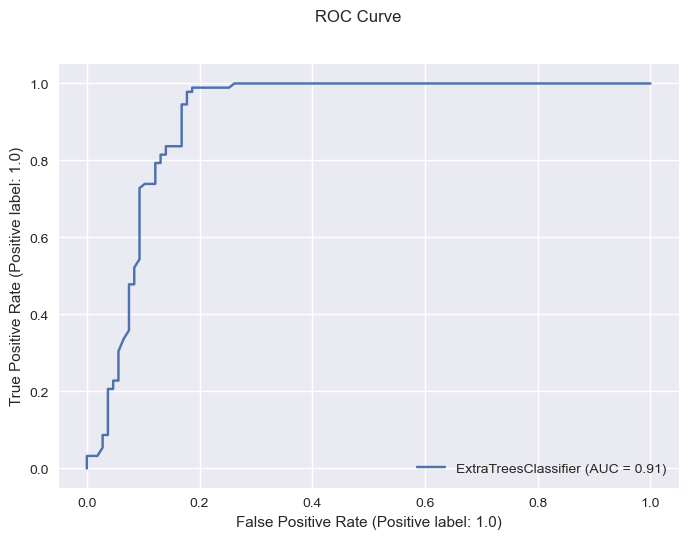

In [66]:
from sklearn import metrics
plt.style.use('seaborn')
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

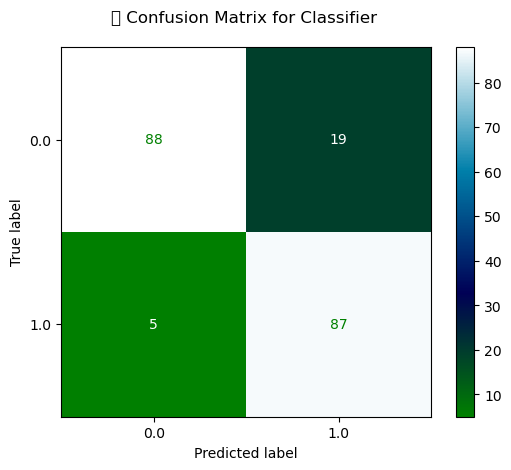

In [67]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='ocean')
plt.title('\t Confusion Matrix for Classifier \n')
plt.show()

In [68]:
import pickle

In [69]:
filename = "Loan_pred_finaltest.pkl"
pickle.dump(Final_Model, open(filename,'wb'))